# MTE 544 Lab 4 Report

|Stephen Wang|Ajit Rakhra|Howard Dong|
|:-:|:-:|:-:|
|x2274wan|a3rakhra|h53dong|
|20821034|20832703|20847639|

Station 3, Robot 14 on Fri Dec 1 at 8:30 AM

## A* Algorithm

The A\* search algorithm is used to find a path on the occupancy grid, which can then be turned into a trajectory in the Cartesian birds-eye plane.
The algorithm can be summarized in the following list.
Each cell in the occupancy grid is represented as a custom `Node` datatype.
A `Node` contains its parent and its location;
`Node`s can subtract each other to calculate the heuristic distance;
`Node`s can compare with each other to return `True` when their locations match.

1. Initialize the list of unvisited pixels with a `Node` representing the start
1. For each unvisited pixel:
    1. Remove that pixel and add it to the list of visited pixels
    1. If the pixel is the goal, return the path created by pixels of descending cost
    1. Create `Node`s for the neighbouring pixels that takes one additional cost to travel to
    1. For each neighbouring pixel:
        1. Skip if it's already been visited, otherwise
        1. Update the "real" cost to be 1 + its parent
        1. Update the heuristic cost either with Euclidean distance or Manhattan distance
        1. Update its total cost as the sum of the above
        1. If it's in the unvisited list and the heuristic cost is lower
            1. Add it to the list of unvisited nodes
1. Repeat until there is no more node in the unvisited list

Following this algorithm, every pixel can be visited but in contrast to Dijkstra's algorithm, the pattern of descending cost between the pixels/`Node`s will also be influenced by the heuristic cost.

In [5]:
%config InlineBackend.figure_formats = ["svg"]

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import PIL

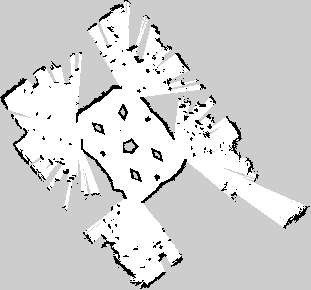

In [5]:
PIL.Image.open("room.pgm")

## Using A*

The following graphs show the robot's planed trajectory.
Trajectory 1 was executed using an EKF for localization and Trajectory 2 used Odometry alone.
Both trajectories demonstrate successfully planned paths using the A* algorithm with Euclidean distance as the heuristic cost.
The effect of using Manhattan distance and Euclidean distance as the heuristic cost is elaborated in the next section.
Note that during the lab, the safety distance around the obstacles in the map, denoted as $\sigma$ has been set to 0.5 during the lab.

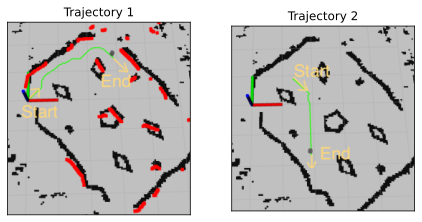

In [7]:
fig, axes = plt.subplots(1,2)
fig.tight_layout(h_pad=0)

ax = axes[0]
ax.imshow(mpimg.imread("path1.png"))
ax.set_title("Trajectory 1")
ax.set_xticks([])
ax.set_yticks([])

ax = axes[1]
ax.imshow(mpimg.imread("path2.png"))
ax.set_title("Trajectory 2")
ax.set_xticks([])
ax.set_yticks([])

plt.show()

## Effect of the Heuristic Cost in A*

The following screenshots compares the trajectories using the Manhattan and Euclidean distance as the heuristic cost in the A* algorithm. 
The Manhattan distance can be calculated as
$$ d^{Manhattan}_{a,b} = |x_a - x_b| + |y_a - y_b| $$
The Euclidean distance can be calculated as
$$ d^{Euclidean}_{a,b} = \sqrt{(x_a-x_b)^2 + (y_a-y_b)^2} $$

The heuristic cost can be calculated as $d_{i,goal}$ using one of these distances.
The total cost of node $i$ in the A* algorithm is thus the number of parents of $i$ plus $d_{i,goal}$.

The figure below shows a comparison between using Manhattan distance as the heuristic cost and using Euclidean distance as the heuristic cost.
The high $\sigma$ gives more room for error in case the controller does not track the planned trajectory perfectly on the one hand, but makes small defects in the SLAM map unnavigable on the other.
In other words, the planner chose a farther path than what the human eye perceives because there's a blip in the middle of the map.

Using Euclidean distance, A* is incentivized to "travel" diagonally pixel wise because the triangle inequality makes diagonal moves more favourable than horizontal or vertical moves, especially in "open spaces" not constraint by obstacles.

Using Manhattan distance, only the 4 "straight" neighbours are considered as a move so there is no difference between a "diagonal" move and a "straight" move because the heuristic cost would perfectly cancel out with the "real" cost.
The trajectory ended up being more "straight" because of the way the cost descent function is implemented.

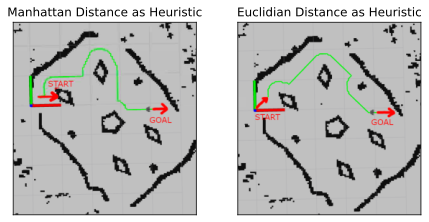

In [8]:
fig, axes = plt.subplots(1,2)
fig.tight_layout(h_pad=0)

ax = axes[0]
ax.imshow(mpimg.imread("manhattan-arrow.png"))
ax.set_title("Manhattan Distance as Heuristic")
ax.set_xticks([])
ax.set_yticks([])

ax = axes[1]
ax.imshow(mpimg.imread("euclidean-arrow.png"))
ax.set_title("Euclidian Distance as Heuristic")
ax.set_xticks([])
ax.set_yticks([])

plt.show()